To vary parameter alpha in [1.e-01 1.e+00 3.e+00 1.e+01 1.e+02 1.e+03], visit ['c8c7bc7a9073033c' 'dac51c601a7c5def' '6c580e4c4e0e3b8b'
 '7bcf38870172255b' '347b1c4776950370' 'ab84e2857dfdd145']


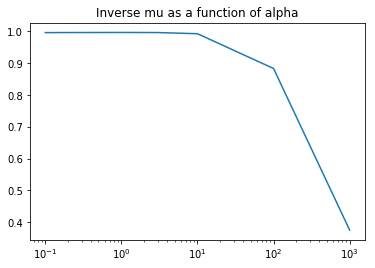

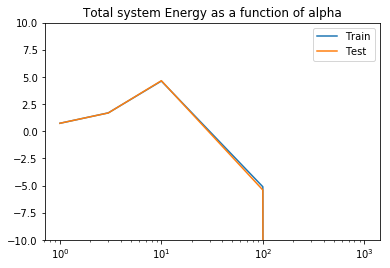

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from experiment_manager.explorer import make_index, get_immediate_subdirectories, get_siblings

# Use parameters_database.csv to find a suitable base experiment
base_exp = '347b1c4776950370'
param_to_vary = 'alpha'

hashs_of_interest, param_values = get_siblings(base_exp, param_to_vary)

# For each experiment, look at the last part of the mu curve 
# If stable, plot the inverse of $\mu_{\infty}$, otherwise 0 -> should see a PT in gamma

mu_inf_inv = []
for exp_hash in hashs_of_interest:
    mu_rec = np.load('out/raw/{}/mu_avg.npy'.format(exp_hash))[-100:]
    mu_std_criterion = np.load('out/raw/{}/mu_std.npy'.format(exp_hash))[-100]
    
    if mu_rec[-1] > mu_rec[0] + 5 * mu_std_criterion or mu_rec[-1] < mu_rec[0] - 5 * mu_std_criterion:
        mu_inf_inv.append(0)
        continue
    else:
        mu_inf_inv.append(1. / mu_rec[-1])
        
plt.figure()
plt.semilogx(param_values, mu_inf_inv)
plt.title('Inverse mu as a function of {}'.format(param_to_vary))
plt.savefig('out/processed/mu_inv_{}.pdf'.format(param_to_vary))


# For each experiment, look at the last part of the E curve 

E_inf_inv_train = []
for exp_hash in hashs_of_interest[1:]:
    E_inf_inv_train.append(np.load('out/raw/{}/E_train_avg.npy'.format(exp_hash))[-1])
        
E_inf_inv_test = []
for exp_hash in hashs_of_interest[1:]:
    E_inf_inv_test.append(np.load('out/raw/{}/E_test_avg.npy'.format(exp_hash))[-1])
        
plt.figure()
plt.semilogx(param_values[1:], E_inf_inv_train, label='Train')
plt.semilogx(param_values[1:], E_inf_inv_test, label='Test')
plt.title('Total system Energy as a function of {}'.format(param_to_vary))
plt.ylim(-10, 10)
plt.legend()
plt.savefig('out/processed/E_{}.pdf'.format(param_to_vary))
